<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_1_6)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-1.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.6_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,64.509964,21.625424,39.829645,0.024230,135.989263,135.953212,0.036051
1,0.0,1.0,87.121375,29.295816,27.288255,0.024871,153.730318,153.687769,0.042549
2,0.0,2.0,28.718305,36.368972,78.410260,0.023902,153.521438,153.500646,0.020792
3,0.0,3.0,59.827060,77.165774,65.490110,0.015383,212.498327,212.484938,0.013389
4,0.0,4.0,22.705780,62.296061,29.699813,-0.048454,124.653200,124.714658,-0.061458
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,74.370391,59.462638,81.983108,0.007530,225.823667,225.826987,-0.003320
19996,999.0,16.0,88.554546,98.924409,77.325409,0.010927,274.815291,274.827649,-0.012358
19997,999.0,17.0,35.758863,48.385857,81.992483,0.050159,176.187363,176.158210,0.029153
19998,999.0,18.0,48.623471,24.887891,52.931313,0.012621,136.455296,136.440045,0.015251


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    64.509964  21.625424  39.829645  0.024230  135.989263   
      1.0    87.121375  29.295816  27.288255  0.024871  153.730318   
      2.0    28.718305  36.368972  78.410260  0.023902  153.521438   
      3.0    59.827060  77.165774  65.490110  0.015383  212.498327   
      4.0    22.705780  62.296061  29.699813 -0.048454  124.653200   
...                ...        ...        ...       ...         ...   
999.0 15.0   74.370391  59.462638  81.983108  0.007530  225.823667   
      16.0   88.554546  98.924409  77.325409  0.010927  274.815291   
      17.0   35.758863  48.385857  81.992483  0.050159  176.187363   
      18.0   48.623471  24.887891  52.931313  0.012621  136.455296   
      19.0   29.323632  42.431726  44.489310 -0.018028  126.226639   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    135.953212  0.036051  
      1.0    153.687769  0.042549  
      2.0    153.500646  0.020792  
      3.0    212.484938  0.013389  
      4.0    124.714658 -0.061458  
...                 ...       ...  
999.0 15.0   225.826987 -0.003320  
      16.0   274.827649 -0.012358  
      17.0   176.158210  0.029153  
      18.0   136.440045  0.015251  
      19.0   126.256358 -0.029719  

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    64.509964  21.625424  39.829645  0.024230  135.989263   
      1.0    87.121375  29.295816  27.288255  0.024871  153.730318   
      2.0    28.718305  36.368972  78.410260  0.023902  153.521438   
      3.0    59.827060  77.165774  65.490110  0.015383  212.498327   
      4.0    22.705780  62.296061  29.699813 -0.048454  124.653200   
...                ...        ...        ...       ...         ...   
999.0 15.0   74.370391  59.462638  81.983108  0.007530  225.823667   
      16.0   88.554546  98.924409  77.325409  0.010927  274.815291   
      17.0   35.758863  48.385857  81.992483  0.050159  176.187363   
      18.0   48.623471  24.887891  52.931313  0.012621  136.455296   
      19.0   29.323632  42.431726  44.489310 -0.018028  126.226639   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    135.953212  0.036051  
      1.0    153.687769  0.042549  
      2.0    153.500646  0.020792  
      3.0    212.484938  0.013389  
      4.0    124.714658 -0.061458  
...                 ...       ...  
999.0 15.0   225.826987 -0.003320  
      16.0   274.827649 -0.012358  
      17.0   176.158210  0.029153  
      18.0   136.440045  0.015251  
      19.0   126.256358 -0.029719  

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,64.509964,21.625424,39.829645,0.024230,135.989263,135.953212,0.036051
1,0.0,1.0,87.121375,29.295816,27.288255,0.024871,153.730318,153.687769,0.042549
2,0.0,2.0,28.718305,36.368972,78.410260,0.023902,153.521438,153.500646,0.020792
3,0.0,3.0,59.827060,77.165774,65.490110,0.015383,212.498327,212.484938,0.013389
4,0.0,4.0,22.705780,62.296061,29.699813,-0.048454,124.653200,124.714658,-0.061458
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,74.370391,59.462638,81.983108,0.007530,225.823667,225.826987,-0.003320
19996,999.0,16.0,88.554546,98.924409,77.325409,0.010927,274.815291,274.827649,-0.012358
19997,999.0,17.0,35.758863,48.385857,81.992483,0.050159,176.187363,176.158210,0.029153
19998,999.0,18.0,48.623471,24.887891,52.931313,0.012621,136.455296,136.440045,0.015251


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    64.509964  21.625424  39.829645  0.024230  135.989263   
      1.0    87.121375  29.295816  27.288255  0.024871  153.730318   
      2.0    28.718305  36.368972  78.410260  0.023902  153.521438   
      3.0    59.827060  77.165774  65.490110  0.015383  212.498327   
      4.0    22.705780  62.296061  29.699813 -0.048454  124.653200   
...                ...        ...        ...       ...         ...   
999.0 15.0   74.370391  59.462638  81.983108  0.007530  225.823667   
      16.0   88.554546  98.924409  77.325409  0.010927  274.815291   
      17.0   35.758863  48.385857  81.992483  0.050159  176.187363   
      18.0   48.623471  24.887891  52.931313  0.012621  136.455296   
      19.0   29.323632  42.431726  44.489310 -0.018028  126.226639   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    135.953212  0.036051  
      1.0    153.687769  0.042549  
      2.0    153.500646  0.020792  
      3.0    212.484938  0.013389  
      4.0    124.714658 -0.061458  
...                 ...       ...  
999.0 15.0   225.826987 -0.003320  
      16.0   274.827649 -0.012358  
      17.0   176.158210  0.029153  
      18.0   136.440045  0.015251  
      19.0   126.256358 -0.029719  

[20000 rows x 7 columns]

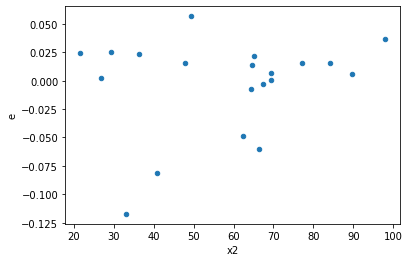

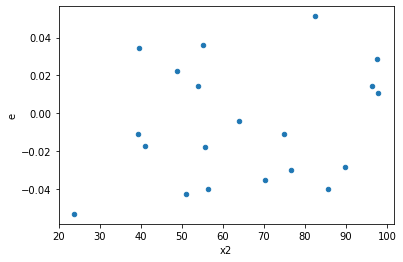

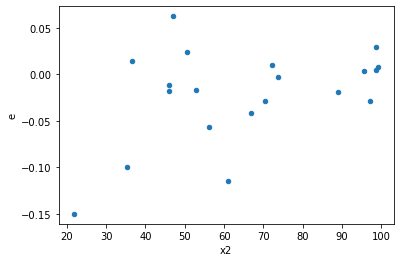

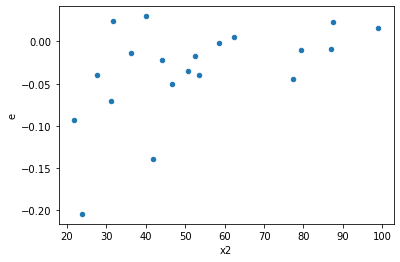

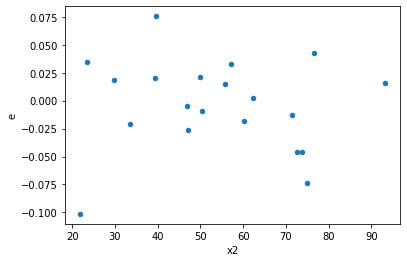

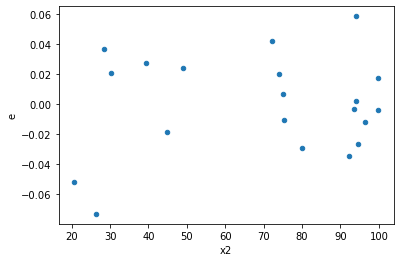

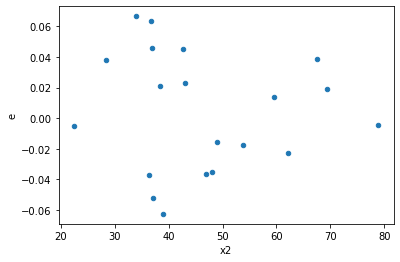

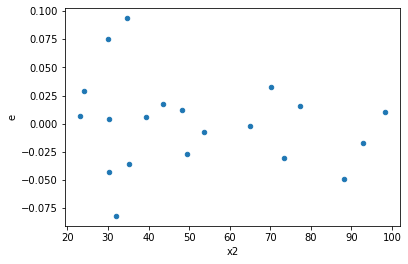

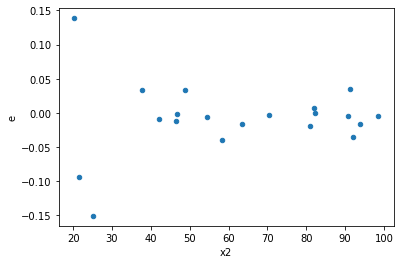

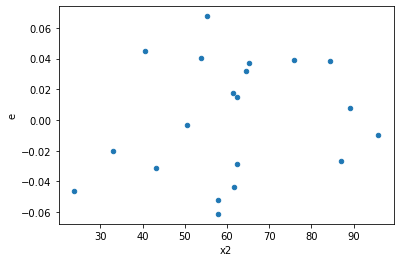

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,9.0,5.0,0.013569651817304096,0.008248070589335528,0.0015077390908115663,0.0016496141178671056,1.094097863430186,0.9737211015372222,0.5131394492313889,0.4868605507686111,Reject001=1 : Homoscedasticity
2.0,7.0,7.0,0.005526094307658369,0.026512224903131473,0.0007894420439511956,0.003787460700447353,4.797642498860245,0.055511562948120874,0.9722442185259396,0.027755781474060437,Reject001=1 : Homoscedasticity
4.0,6.0,8.0,0.008241589965763777,0.01599429510040571,0.0013735983276272961,0.0019992868875507138,1.4555105720055799,0.6072584925575435,0.6963707537212283,0.30362924627877175,Reject001=1 : Homoscedasticity
5.0,6.0,8.0,0.0057203464459642936,0.00914320221359702,0.0009533910743273823,0.0011429002766996275,1.1987738373845633,0.7895925588094097,0.6052037205952951,0.39479627940470485,Reject001=1 : Homoscedasticity
6.0,8.0,6.0,0.00877380019244847,0.01572094358996395,0.0010967250240560588,0.0026201572649939917,2.3890740226786904,0.3046132314245913,0.8476933842877044,0.15230661571229565,Reject001=1 : Homoscedasticity
7.0,8.0,6.0,0.008286899115405399,0.008058991193297534,0.0010358623894256749,0.0013431651988829224,1.2966637389234963,0.7727719401733948,0.6136140299133026,0.3863859700866974,Reject001=1 : Homoscedasticity
10.0,5.0,9.0,0.003103531999630079,0.014388345174083224,0.0006207063999260158,0.0015987050193425804,2.5756219358027175,0.2060688928175327,0.8969655535912336,0.10303444640876636,Reject001=1 : Homoscedasticity
22.0,8.0,6.0,0.010545238049714481,0.018063207163733396,0.0013181547562143101,0.003010534527288899,2.283900667274485,0.3300780412016002,0.8349609793991999,0.1650390206008001,Reject001=1 : Homoscedasticity
30.0,6.0,8.0,0.006535331764104072,0.010585903399201608,0.001089221960684012,0.001323237924900201,1.2148469023423207,0.7765816016898448,0.6117091991550776,0.3882908008449224,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,5.0,0.013569651817304096,0.008248070589335528,0.0015077390908115663,0.0016496141178671056,1.094097863430186,0.9737211015372222,Reject001=1 : Homoscedasticity
1.0,7.0,7.0,0.005917361104385795,0.005358544577592723,0.000845337300626542,0.0007655063682275318,0.9055632203383884,0.8992467391487223,Reject001=1 : Homoscedasticity
2.0,7.0,7.0,0.005526094307658369,0.026512224903131473,0.0007894420439511956,0.003787460700447353,4.797642498860245,0.055511562948120874,Reject001=1 : Homoscedasticity
3.0,7.0,7.0,0.035297145563472083,0.0016549222835055709,0.005042449366210297,0.00023641746907222442,0.046885442351978696,0.0006481701745892749,Reject001=0 : Heteroscedasticity
4.0,6.0,8.0,0.008241589965763777,0.01599429510040571,0.0013735983276272961,0.0019992868875507138,1.4555105720055799,0.6072584925575435,Reject001=1 : Homoscedasticity
5.0,6.0,8.0,0.0057203464459642936,0.00914320221359702,0.0009533910743273823,0.0011429002766996275,1.1987738373845633,0.7895925588094097,Reject001=1 : Homoscedasticity
6.0,8.0,6.0,0.00877380019244847,0.01572094358996395,0.0010967250240560588,0.0026201572649939917,2.3890740226786904,0.3046132314245913,Reject001=1 : Homoscedasticity
7.0,8.0,6.0,0.008286899115405399,0.008058991193297534,0.0010358623894256749,0.0013431651988829224,1.2966637389234963,0.7727719401733948,Reject001=1 : Homoscedasticity
8.0,10.0,4.0,0.04263263836719428,0.0010014549118267783,0.004263263836719428,0.00025036372795669457,0.058725834840507765,0.0003686098182084133,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      831
Reject001=0 : Heteroscedasticity    169
Name: Result_test, dtype: int64